Importing required librarires

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Collection and reading the data

In [2]:
df=pd.read_csv('./heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Checking missing values are present in data or not

In [4]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

1= Defective Heart

0= Healthy Heart

In [6]:
X=df.drop(columns='target',axis=1)
y=df['target']

Spliting data into train and test

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

Scaling


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

Model training

In [10]:
model=LogisticRegression()

In [11]:
model.fit(X_train,y_train)

LogisticRegression()

In [12]:
model.score(X_train,y_train)

0.8429752066115702

Model Evalutaion

In [13]:
#Accuracy on testing data
X_test_Pred=model.predict(X_test)
test_data_accuracy=accuracy_score(y_test,X_test_Pred)

In [14]:
test_data_accuracy

0.8524590163934426

In [15]:
print('Accuracy on Test Data :', round(test_data_accuracy*100,2),'%')

Accuracy on Test Data : 85.25 %


Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix


In [17]:
cf=confusion_matrix(y_test,X_test_Pred)
cf

array([[18,  3],
       [ 6, 34]], dtype=int64)

<AxesSubplot:>

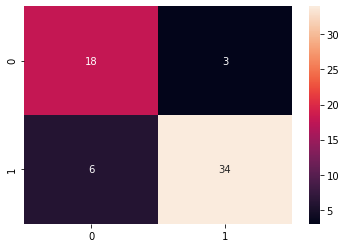

In [18]:
import seaborn as sns
sns.heatmap(cf,annot=True)

Precision Score

Precision is the ratio of number of True Positive to the total number of Predicted Positive. It measures,out of the total predicted positive,how many actually positive

In [19]:
from sklearn.metrics import precision_score

In [20]:
#precision for test data prediction

X_test_Pred=model.predict(X_test)
test_data_precision=precision_score(y_test,X_test_Pred)

In [21]:
test_data_precision

0.918918918918919

Recall

Recall is the ratio of number of True Positive to total number of Actual Positive.It measures,out of the total actual positive,how many are predicted as True Positive

In [22]:
from sklearn.metrics import recall_score

In [23]:
X_test_Pred=model.predict(X_test)
test_data_recall=recall_score(y_test,X_test_Pred)

In [24]:
test_data_recall

0.85

F1 Score

F1 score is an important evalutaion matric for binary classification that combines precision & recall.F1 score is the harmonic mean of precision and recall

In [25]:
 from sklearn.metrics import f1_score

In [26]:
X_test_Pred=model.predict(X_test)
test_data_f1_score=f1_score(y_test,X_test_Pred)

In [27]:
test_data_f1_score

0.8831168831168831